In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
from folium.plugins import MarkerCluster

In [6]:
import folium as fl

In [7]:
from geopy.geocoders import  Nominatim

In [8]:
geolocator=Nominatim(user_agent="Put your address here")

In [11]:
import seaborn as sns

In [12]:
df_nacidos_vivos = pd.read_csv('https://www.datos.gov.co/api/views/u5y2-ufx9/rows.csv?accessType=DOWNLOAD')

In [13]:
df_nacidos_vivos.head(2)

,Departamento Nacimiento,Municipio Nacimiento,Área Nacimiento,Género,Peso,Talla,Fecha de Nacimiento,Hora de Nacimiento,Parto Atendido por...,Tiempo de Gestación,...,Rural Disperso,Número de Hijos Nacidos Vivos,Fecha Anterior del Hijo Nacido Vivo,Número de Embarazos,Régimen Seguridad,Tipo de Administración,Nombre de la Administradora,Edad del Padre,Nivel Educativo del Padre,Último Año Aprobado del Padre
0,VALLE DEL CAUCA,CALI,CABECERA MUNICIPAL,MASCULINO,3672,52,01/01/2016 12:00:00 AM,22:43:00,MÉDICO,39,...,NaN,1,NaN,1,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,EPS S.O.S. S.A. - EPS SERVICIO OCCIDENTAL DE S...,38,MEDIA ACADÉMICA O CLÁSICA,11.0
1,VALLE DEL CAUCA,GUADALAJARA DE BUGA,CABECERA MUNICIPAL,FEMENINO,2825,48,02/01/2016 12:00:00 AM,6:50:00,MÉDICO,37,...,NaN,1,,1,SUBSIDIADO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,EMSSANAR ESS - ASOCIACION MUTUAL EMPRESA SOLID...,23,MEDIA ACADÉMICA O CLÁSICA,11.0


In [14]:
df_new_nacidos_vivos=df_nacidos_vivos
select = ['Género', 'Peso', 'Talla','Tiempo de Gestación','Tipo de Parto','Multiplicidad de Embarazo', 'Pertenencia Étnica',  'Edad de la Madre', 'Estado Conyugal Madre','Nivel Educativo de la Madre1','Número de Hijos Nacidos Vivos','Número de Embarazos','Edad del Padre','Nivel Educativo del Padre']

In [15]:
df_new_nacidos_vivos = df_nacidos_vivos[select]
df_new_nacidos_vivos.to_csv('df.csv')



1.  ¿De qué género hay mayor cantidad de nacidos?



In [16]:
select2 = ['Género','Número de Hijos Nacidos Vivos']
group = ['Género']
est = df_new_nacidos_vivos[select2].groupby(group).count()
est

,Número de Hijos Nacidos Vivos
Género,
FEMENINO,695
MASCULINO,737


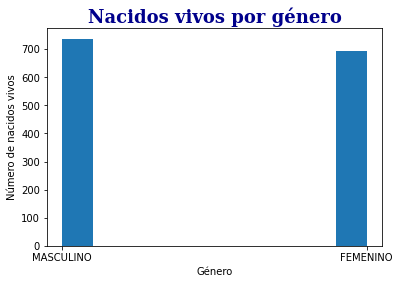

In [17]:
plt.hist(df_new_nacidos_vivos["Género"], label="Nacidos vivos por género");
plt.xlabel("Género")
plt.ylabel("Número de nacidos vivos");
plt.title("Nacidos vivos por género", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18});

2. ¿Qué tipo de parto es más común encontrar entre las madres?


In [18]:
select3 = ['Tipo de Parto', 'Número de Hijos Nacidos Vivos']
group1 =['Tipo de Parto']
df_new_nacidos_vivos_tipo_parto = df_new_nacidos_vivos[select3].groupby(group1).count()
df_new_nacidos_vivos_tipo_parto

,Número de Hijos Nacidos Vivos
Tipo de Parto,
CESÁREA,497
ESPONTÁNEO,934
INSTRUMENTADO,1


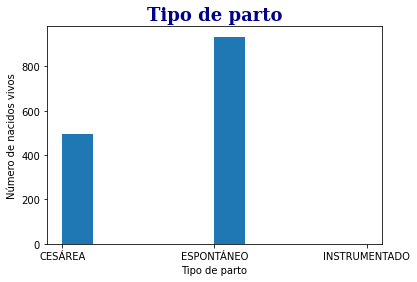

In [19]:
plt.hist(df_new_nacidos_vivos['Tipo de Parto']);
plt.ylabel("Número de nacidos vivos");
plt.xlabel("Tipo de parto")
plt.title("Tipo de parto", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18});

3. ¿Cuántas madres son menores de edad?


In [20]:
mask1 = df_new_nacidos_vivos['Edad de la Madre']<18
df_madres_menores = df_new_nacidos_vivos[mask1]
df_madres_menores
select7=["Edad de la Madre"]
df_madres_menores=df_madres_menores[select7]
df_madres_menores.sort_index();
df_madres_menores.reset_index(inplace=True)
df_madres_menores = df_madres_menores.drop(columns=['index'])
df_madres_menores



,Edad de la Madre
0,17
1,16
2,16
3,17
4,15
...,...
135,17
136,16
137,17
138,14


Text(0.5, 1.0, 'Madres menores de edad')

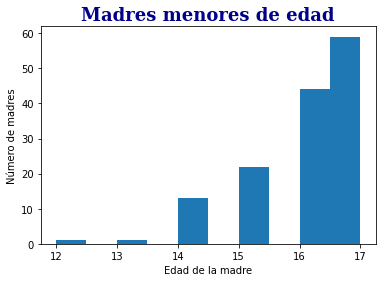

In [21]:
plt.hist(df_madres_menores["Edad de la Madre"]);
plt.xlabel("Edad de la madre")
plt.ylabel("Número de madres");
plt.title("Madres menores de edad", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})


**Promedio edad de la madre según el número de hijos**



In [22]:
select5 =['Número de Hijos Nacidos Vivos','Edad de la Madre']
group3 = ['Número de Hijos Nacidos Vivos']
df_new_nacidos_vivos[select5].groupby(group3).mean() 
df_edad_madre=df_new_nacidos_vivos[select5].groupby(group3).mean()
df_edad_madre
df_edad_madre.reset_index(inplace=True)
df_edad_madre

,Número de Hijos Nacidos Vivos,Edad de la Madre
0,1,22.475928
1,2,26.665314
2,3,28.948387
3,4,31.800000
4,5,33.076923
5,6,34.000000
6,7,35.000000
7,8,34.000000


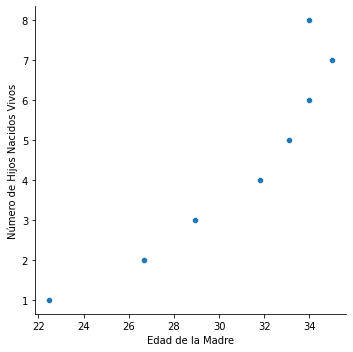

In [23]:

g=sns.relplot(data=df_edad_madre, x="Edad de la Madre", y="Número de Hijos Nacidos Vivos");

**¿Cuál es la tendencia de pertenencia étnica?**


In [24]:
select6 = ['Pertenencia Étnica', 'Número de Hijos Nacidos Vivos']
group4 = ['Pertenencia Étnica']
df_etnia=df_new_nacidos_vivos[select6].groupby(group4).count()
df_etnia
df_etnia.reset_index(inplace=True);
df_etnia


,Pertenencia Étnica,Número de Hijos Nacidos Vivos
0,INDÍGENA,3
1,"NEGRO(A), MULATO(A), AFRO COLOMBIANO(A) O AFRO...",948
2,NINGUNO DE LOS ANTERIORES,481


([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

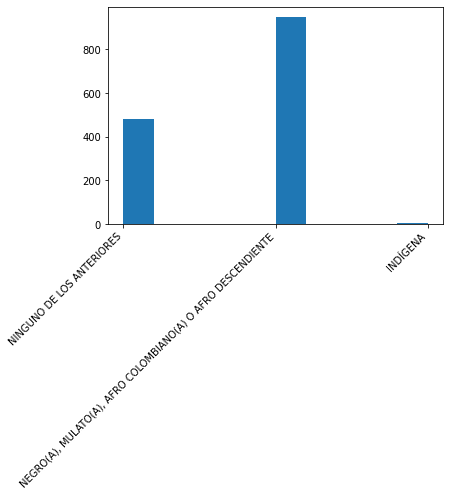

In [25]:
plt.hist(df_nacidos_vivos["Pertenencia Étnica"]);
plt.xticks(rotation=45,horizontalalignment='right')



**¿Existe una relación entre el tiempo de gestación y la talla del bebe?**




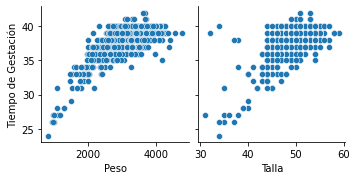

In [26]:
select = ['Peso', 'Talla','Tiempo de Gestación']
df_tiempoges=df_nacidos_vivos[select]
sns.pairplot(data=df_tiempoges, x_vars=["Peso", "Talla"], y_vars=["Tiempo de Gestación"])

**¿Cuál es la relación entre el sexo y la talla?**


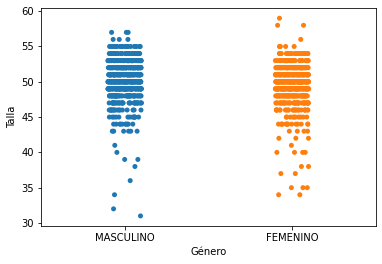

In [27]:
select=["Género", "Talla", "Peso"]
df_genero=df_nacidos_vivos[select]
sns.stripplot(data=df_genero, x="Género", y="Talla");



**¿Cuál es la relación entre el sexo y el peso**

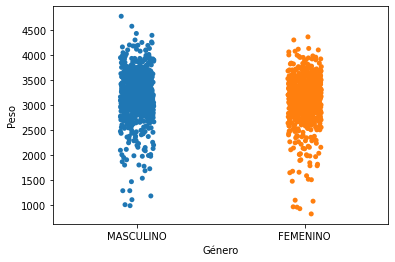

In [28]:
sns.stripplot(data=df_genero, x="Género", y="Peso");

**¿Cual es la tendencia del número de embarazos y el nivel educativo de la madre?**


Text(0.5, 1.0, 'Relación nivel educativo de la madre y número de embarazos')

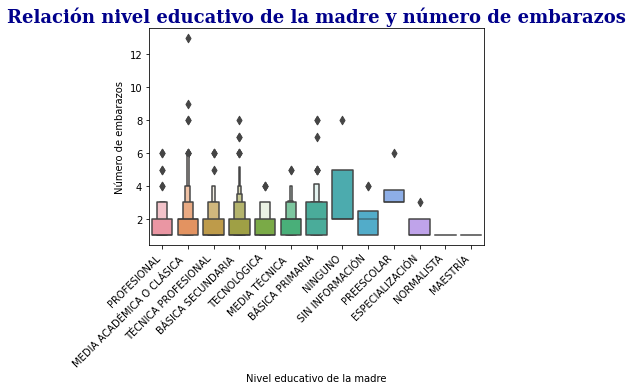

In [29]:
h=sns.boxenplot(data=df_new_nacidos_vivos, y='Número de Embarazos', x='Nivel Educativo de la Madre1');
plt.xticks(rotation=45,horizontalalignment='right')
plt.xlabel("Nivel educativo de la madre")
plt.ylabel("Número de embarazos");
plt.title("Relación nivel educativo de la madre y número de embarazos", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})



**¿Cual es la tendencia del número de embarazos y el nivel educativo del padre?**

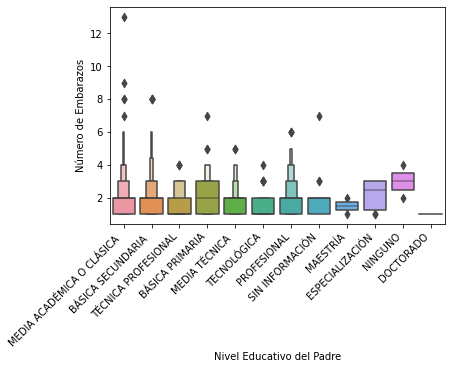

In [30]:
sns.boxenplot(data=df_new_nacidos_vivos, y='Número de Embarazos', x='Nivel Educativo del Padre');
plt.xticks(rotation=45,horizontalalignment='right');

**Generacion de mapas y localizacion de dirreciones**


In [31]:
df_nacidos_vivos
select8=['Municipio Residencia','Dirección']

In [32]:
df_location=df_nacidos_vivos[select8]


In [33]:
direccion=df_location['Dirección']
direccion.str.replace('KR','Carrera')
dri=pd.DataFrame(direccion)






In [34]:
df_location_kr=df_location[df_location.Dirección.str.contains('KR')==True]
df_location_kr
df_location_kr['Dirección']=df_location_kr.Dirección.str.replace('KR','Carrera')



C:\Users\Elkin\AppData\Local\Temp\ipykernel_6560\553804824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_location_kr['Dirección']=df_location_kr.Dirección.str.replace('KR','Carrera')


In [35]:
df_location_CL=df_location[df_location.Dirección.str.contains('CL')==True]


In [36]:
df_address=df_location_CL.append(df_location_kr)
pd.DataFrame(df_address)
df_address.columns=['municipality','address']
df_address

C:\Users\Elkin\AppData\Local\Temp\ipykernel_6560\3177837642.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_address=df_location_CL.append(df_location_kr)


,municipality,address
0,GUADALAJARA DE BUGA,CL 14 12 01
2,GUADALAJARA DE BUGA,CL 12 12-90
4,GUADALAJARA DE BUGA,CL 22 15-37
6,GUADALAJARA DE BUGA,CL 31 13-16
7,GUADALAJARA DE BUGA,CL 31 13-16
...,...,...
1417,GUADALAJARA DE BUGA,Carrera 20 2 - 30
1420,GUADALAJARA DE BUGA,Carrera 12 15-29
1425,GUADALAJARA DE BUGA,Carrera 31B 14A-65
1426,GUADALAJARA DE BUGA,Carrera 81ER BIS 3-107


In [37]:
df_address['location']=df_address['municipality']+', '+df_address['address']
df_address.sort_index(ignore_index=False)




,municipality,address,location
0,GUADALAJARA DE BUGA,CL 14 12 01,"GUADALAJARA DE BUGA, CL 14 12 01"
2,GUADALAJARA DE BUGA,CL 12 12-90,"GUADALAJARA DE BUGA, CL 12 12-90"
3,GUADALAJARA DE BUGA,Carrera 14 18-50,"GUADALAJARA DE BUGA, Carrera 14 18-50"
4,GUADALAJARA DE BUGA,CL 22 15-37,"GUADALAJARA DE BUGA, CL 22 15-37"
5,GUADALAJARA DE BUGA,Carrera 11 11-78,"GUADALAJARA DE BUGA, Carrera 11 11-78"
...,...,...,...
1422,GUADALAJARA DE BUGA,CL 18A 16-83,"GUADALAJARA DE BUGA, CL 18A 16-83"
1425,GUADALAJARA DE BUGA,Carrera 31B 14A-65,"GUADALAJARA DE BUGA, Carrera 31B 14A-65"
1426,GUADALAJARA DE BUGA,Carrera 81ER BIS 3-107,"GUADALAJARA DE BUGA, Carrera 81ER BIS 3-107"
1429,GUADALAJARA DE BUGA,Carrera 29 16-65,"GUADALAJARA DE BUGA, Carrera 29 16-65"


**Conversión de direcciones a coordenadas geograficas**

In [44]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df_address['location']=df_address['location'].apply(geocode)
df_address['Lat'] = df_address['location'].apply(lambda x: x.latitude if x else None)
df_address['Lon'] = df_address['location'].apply(lambda x: x.longitude if x else None)


In [ ]:
df_address=pd.read_csv('df_address.csv')
df_address.head()

FileNotFoundError: [Errno 2] No such file or directory: 'df_address.csv'

In [ ]:
df_address['Genero']=df_nacidos_vivos['Género']
df_address['Regimen']=df_nacidos_vivos['Régimen Seguridad']
df_address

,Unnamed: 0,municipality,address,location,Lat,Lon,Genero,Regimen
0,0,GUADALAJARA DE BUGA,CL 14 12 01,"Calle 14, Buga, Centro, Valle del Cauca, Pacíf...",3.911896,-76.308093,MASCULINO,CONTRIBUTIVO
1,2,GUADALAJARA DE BUGA,CL 12 12-90,"Calle 12, Buga, Centro, Valle del Cauca, Pacíf...",3.910167,-76.308639,FEMENINO,SUBSIDIADO
2,4,GUADALAJARA DE BUGA,CL 22 15-37,"Calle 22, Buga, Centro, Valle del Cauca, Pacíf...",3.914018,-76.300080,MASCULINO,SUBSIDIADO
3,6,GUADALAJARA DE BUGA,CL 31 13-16,"Calle 31, Buga, Centro, Valle del Cauca, Pacíf...",3.919002,-76.293855,MASCULINO,CONTRIBUTIVO
4,7,GUADALAJARA DE BUGA,CL 31 13-16,"Calle 31, Buga, Centro, Valle del Cauca, Pacíf...",3.919002,-76.293855,FEMENINO,SUBSIDIADO
...,...,...,...,...,...,...,...,...
987,1414,GUADALAJARA DE BUGA,Carrera 17 14-59,"Carrera 17, Buga, Centro, Valle del Cauca, Pac...",3.902875,-76.303418,FEMENINO,SUBSIDIADO
988,1415,GUADALAJARA DE BUGA,Carrera 17 14-59,"Carrera 17, Buga, Centro, Valle del Cauca, Pac...",3.902875,-76.303418,MASCULINO,CONTRIBUTIVO
989,1417,GUADALAJARA DE BUGA,Carrera 20 2 - 30,"Carrera 20, Avícola Santa Rita S.A.S, Buga, Ce...",3.889517,-76.310040,MASCULINO,SUBSIDIADO
990,1420,GUADALAJARA DE BUGA,Carrera 12 15-29,"Carrera 12, Buga, Centro, Valle del Cauca, Pac...",3.889313,-76.300320,MASCULINO,CONTRIBUTIVO


In [ ]:
for f, row in df_address.iterrows():
  lat=row['Lat']
  lon=row['Lon']
  

In [ ]:
df_address=df_address.dropna(subset=['Lon'])
df_address=df_address.dropna(subset=['Lat'])


**Generación de mapas y agrupar marcadores**

In [ ]:
map_osm = fl.Map(location=[3.911896, -76.3080927],height="100%",width="100%",zoom_start=12)
marker_cluster = MarkerCluster().add_to(map_osm)
df_address.apply(lambda row:fl.Marker(location=[row["Lat"], row["Lon"]],popup=str('Regimen de seguridad al que pertenece: \n')+row['Regimen']+str('\n Género del bebe: \n')+row['Genero']).add_to(marker_cluster),axis=1)
marker_cluster = MarkerCluster().add_to(map_osm)
map_osm.save('mapa_guadalajara_de_Buga.html')
map_osm